In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fraudTrain.csv")
df.drop(df.columns[0], axis = 1, inplace = True)
pd.set_option('display.max_columns', None)
df.shape 




(1296675, 22)

In [18]:
# Select the ones you want
df1 = df[['trans_date_trans_time','cc_num']]
df1 


trans_date_trans_time               cc_num
0         2019-01-01 00:00:18     2703186189652095
1         2019-01-01 00:00:44         630423337322
2         2019-01-01 00:00:51       38859492057661
3         2019-01-01 00:01:16     3534093764340240
4         2019-01-01 00:03:06      375534208663984
...                       ...                  ...
1296670   2020-06-21 12:12:08       30263540414123
1296671   2020-06-21 12:12:19     6011149206456997
1296672   2020-06-21 12:12:32     3514865930894695
1296673   2020-06-21 12:13:36     2720012583106919
1296674   2020-06-21 12:13:37  4292902571056973207

[1296675 rows x 2 columns]

In [19]:
df.index


RangeIndex(start=0, stop=1296675, step=1)

In [20]:
df.isna().sum() 


trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [21]:
# Select the ones you want
df1 = df[['trans_date_trans_time','cc_num']]

In [22]:
df1

trans_date_trans_time               cc_num
0         2019-01-01 00:00:18     2703186189652095
1         2019-01-01 00:00:44         630423337322
2         2019-01-01 00:00:51       38859492057661
3         2019-01-01 00:01:16     3534093764340240
4         2019-01-01 00:03:06      375534208663984
...                       ...                  ...
1296670   2020-06-21 12:12:08       30263540414123
1296671   2020-06-21 12:12:19     6011149206456997
1296672   2020-06-21 12:12:32     3514865930894695
1296673   2020-06-21 12:13:36     2720012583106919
1296674   2020-06-21 12:13:37  4292902571056973207

[1296675 rows x 2 columns]

In [23]:
import numpy as np
df_category = df.select_dtypes(exclude=[np.number])


In [24]:
# Lets take one categorical column "city" and see the unique categorical values in it, so that we could replace it with numerical value
df_category['city'].unique()

array(['Moravian Falls', 'Orient', 'Malad City', 'Boulder', 'Doe Hill',
       'Dublin', 'Holcomb', 'Edinburg', 'Manor', 'Clarksville',
       'Clarinda', 'Shenandoah Junction', 'Saint Petersburg', 'Grenada',
       'High Rolls Mountain Park', 'Harrington Park', 'Lahoma',
       'Carlisle', 'Harborcreek', 'Elizabeth', 'Methuen', 'Moulton',
       'Plainfield', 'May', 'Waukesha', 'Bailey', 'Romulus', 'Freedom',
       'Honokaa', 'Valentine', 'Westfir', 'Tiptonville', 'Republic',
       'Baton Rouge', 'Washington', 'Big Creek', 'Bellmore', 'Florence',
       'Allentown', 'Moriches', 'Esbon', 'Chatham', 'Thompson',
       'North Prairie', 'Laredo', 'Grant', 'Conway', 'New Goshen',
       'Sunflower', 'Enola', 'Roosevelt', 'Pointe Aux Pins', 'Dallas',
       'Jay', 'North Tonawanda', 'Athena', 'Chester', 'Elkhart',
       'Surrency', 'Arcadia', 'Gaithersburg', 'Bowdoin', 'Heart Butte',
       'San Jose', 'Rumely', 'Cranks', 'Ravenna', 'Utica', 'Uledi',
       'Naples', 'Thida', 'Parks', 'C

In [25]:
#Find the frequency distribution of each categorical column. To do so, use the value_counts() function on each column. This function returns the counts of unique values in an object
df_category.city.value_counts()

Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: city, Length: 894, dtype: int64

In [26]:
#dataframe with categorical data
data_category = df.select_dtypes(exclude=[np.number]).columns
data_category 


Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

# Creating the object instance for label encoder

label_encoder = LabelEncoder()
for i in data_category:
    df[i] = label_encoder.fit_transform(df[i])
df.head()

trans_date_trans_time            cc_num  merchant  category     amt  first  \
0                      0  2703186189652095       514         8    4.97    162   
1                      1      630423337322       241         4  107.23    309   
2                      2    38859492057661       390         0  220.11    115   
3                      3  3534093764340240       360         2   45.00    163   
4                      4   375534208663984       297         9   41.96    336   

   last  gender  street  city  state    zip      lat      long  city_pop  job  \
0    18       0     568   526     27  28654  36.0788  -81.1781      3495  370   
1   157       0     435   612     47  99160  48.8878 -118.2105       149  428   
2   381       1     602   468     13  83252  42.1808 -112.2620      4154  307   
3   463       1     930    84     26  59632  46.2306 -112.1138      1939  328   
4   149       1     418   216     45  24433  38.4207  -79.4629        99  116   

   dob  trans_num   unix_time  merch_lat  merch_long  is_fraud  
0  779      56438  1325376018  36.011293  -82.048315         0  
1  607     159395  1325376044  49.159047 -118.186462         0  
2  302     818703  1325376051  43.150704 -112.154481         0  
3  397     544575  1325376076  47.034331 -112.561071         0  
4  734     831111  1325376186  38.674999  -78.632459         0

In [28]:
X = df.drop(['is_fraud'], axis = 1)
y = df['is_fraud']
y.value_counts().to_frame().T


0     1
is_fraud  1289169  7506

In [29]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
y_resampled.value_counts().to_frame().T

0        1
is_fraud  1289169  1289169

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sn

from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

def get_acc_and_F1(ratio):
    # create the synthetic dataset
    X, y = make_classification(n_samples=25000, 
                            n_features=20, 
                            n_informative=2, 
                            n_redundant=2, 
                            n_repeated=0, 
                            n_classes=2, 
                            n_clusters_per_class=2, 
                            weights=[ratio, 1-ratio], 
                            flip_y=0.01, 
                            class_sep=1.0, 
                            hypercube=True, 
                            shift=0.0, 
                            scale=1.0, 
                            shuffle=True, 
                            random_state=42)


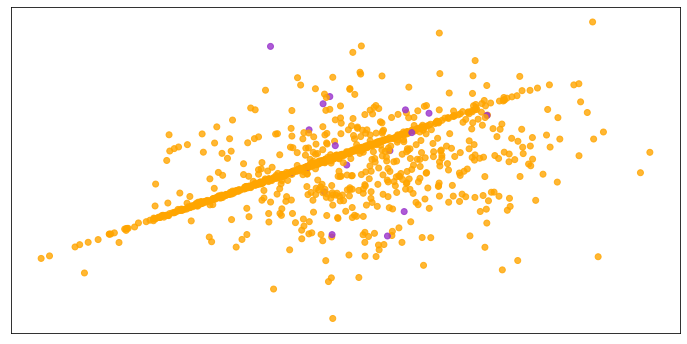

In [31]:
X, y = make_classification(n_samples=1000, 
                            n_classes=2,
                            n_features=2,
                            n_informative=2, 
                            n_redundant=0, 
                            n_repeated=0,
                            weights=[0.99, 1-0.99],
                            class_sep=0.3,
                            random_state=2)

# define the colours to use
my_cmap = matplotlib.colors.ListedColormap(['orange', 'darkorchid'])
# now make a scatter plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=my_cmap, alpha=0.8)
# hide the labels
plt.xticks([])
plt.yticks([])
plt.show();

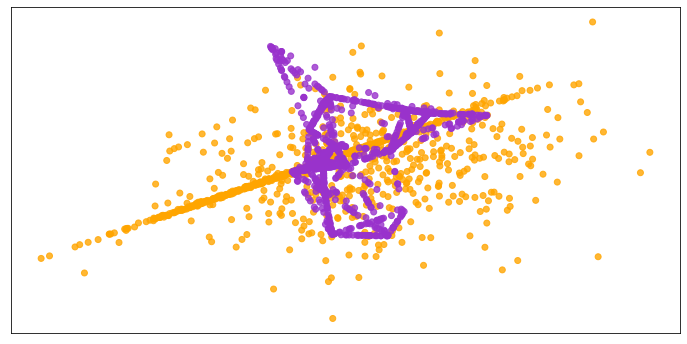

In [32]:
# SMOTE PLOT 
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap=my_cmap, alpha=0.8)
plt.xticks([])
plt.yticks([])
plt.show();